In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [98]:
pd. __version__

'2.2.3'

In [82]:
df_orig = pd.read_csv("cbecs2018_final_public.csv")
df_orig.head()

,PUBID,REGION,CENDIV,PBA,PUBCLIM,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHBTU,ZDHEXP
0,1,3,5,2,3,210000,8,1,4,2,...,0,0,0,0,9,9,1,1,0,0
1,2,4,9,2,4,28000,5,1,6,1,...,0,0,0,0,0,0,9,9,9,9
2,3,3,5,8,4,2100,2,1,4,2,...,0,0,0,0,9,9,9,9,9,9
3,4,3,7,5,5,240000,8,2,6,1,...,0,0,0,0,1,1,9,9,9,9
4,5,1,2,5,3,295000,8,3,6,2,...,0,0,0,0,0,0,9,9,9,9


In [83]:
display(df_orig.loc[(df_orig['PUBID'] > 0) & (df_orig['PBA'] == 2) & (df_orig['PUBCLIM'] == 4) & (df_orig['SQFT'] > 0), ['PUBID', 'PBA']])

,PUBID,PBA
1,2,2
18,19,2
21,22,2
29,30,2
31,32,2
...,...,...
6377,6378,2
6399,6400,2
6406,6407,2
6429,6430,2


In [84]:
df_wk = df_orig.copy()
df_wk.head(2)

,PUBID,REGION,CENDIV,PBA,PUBCLIM,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHBTU,ZDHEXP
0,1,3,5,2,3,210000,8,1,4,2,...,0,0,0,0,9,9,1,1,0,0
1,2,4,9,2,4,28000,5,1,6,1,...,0,0,0,0,0,0,9,9,9,9


#### creates df_wk dataset

In [85]:
df_wk = df_orig.iloc[:,[0,3,4,5,7,8,11,12,13,18,21,77,103,104,113,114,133,
    134,139,140,141,295,378,379,425,561,562,566,569,567,568,570,571]]
df_wk.head()

,PUBID,PBA,PUBCLIM,SQFT,WLCNS,RFCNS,BLDSHP,GLSSPC,NFLOOR,NELVTR,...,NGWATR,NGOTH,HDD65,CDD65,ELBTU,NGBTU,ELCNS,ELEXP,NGCNS,NGEXP
0,1,2,3,210000,1,4,6,3,994,8.0,...,2,2,4463,1759,18708970.0,NaN,5483285.0,775800.0,NaN,NaN
1,2,2,4,28000,1,6,11,3,5,1.0,...,1,2,2424,189,1528667.0,201988.0,448027.0,77933.0,1946.0,4097.0
2,3,8,4,2100,1,4,2,3,1,NaN,...,2,2,3218,2403,52387.0,NaN,15354.0,3472.0,NaN,NaN
3,4,5,5,240000,2,6,2,2,1,NaN,...,1,2,1045,3041,1974255.0,1211520.0,578621.0,41197.0,11672.0,9862.0
4,5,5,3,295000,3,6,1,1,1,NaN,...,2,2,5076,1316,1290564.0,3386445.0,378243.0,33688.0,32625.0,35297.0


#### commit

#### Add cold degree days (CDD) and hot degree days (HDD) low to high ranges and averages to df_wk.
- The code cell below creates the df_clim dataframe.
- The data is from "Climate Data for Building Design Standards".

In [86]:
data = {'PUBCLIM': [2, 3, 4],
        'CDD_LOW': [1800, 2700, 4500],
        'CDD_HI': [6300, 6300, 6300],
        'HDD_LOW': [5400, 3600, 1800],
        'HDD_HI': [7200, 5400, 3600],
        'CDD_AVG': [4050, 4500, 5400],
        'HDD_AVG': [6300, 4500, 2700]
        }

df_clim = pd.DataFrame(data)
print(df_clim)

   PUBCLIM  CDD_LOW  CDD_HI  HDD_LOW  HDD_HI  CDD_AVG  HDD_AVG
0        2     1800    6300     5400    7200     4050     6300
1        3     2700    6300     3600    5400     4500     4500
2        4     4500    6300     1800    3600     5400     2700


- This code cell joins the df_clim to df_wk using the common PUBCLIM column to align the rows based on the 2, 3, and 4 climate zones.

In [87]:
df_wk = pd.merge(df_wk, df_clim, on='PUBCLIM', how='left')
print(df_wk)

      PUBID  PBA  PUBCLIM    SQFT  WLCNS  RFCNS  BLDSHP  GLSSPC  NFLOOR  \
0         1    2        3  210000      1      4       6       3     994   
1         2    2        4   28000      1      6      11       3       5   
2         3    8        4    2100      1      4       2       3       1   
3         4    5        5  240000      2      6       2       2       1   
4         5    5        3  295000      3      6       1       1       1   
...     ...  ...      ...     ...    ...    ...     ...     ...     ...   
6431   6432   14        2  130000      1      1       2       3       3   
6432   6433    1        4    1050      1      5       1       3       1   
6433   6434    2        4  122000      2      6      11       5       5   
6434   6435   23        4   15000      3      5       2       4       1   
6435   6436   14        7  188000      1      6       4       2       7   

      NELVTR  ...      ELCNS     ELEXP    NGCNS    NGEXP  CDD_LOW  CDD_HI  \
0        8.0  ...  548

#### end commit

#### commit

#### Filtered df_wk where the principle business activity (PBA) is 2 = office building, and the buildings are in climate zones PUBCLIM = 2 or 3 or 4.

In [88]:
df_wk_filtered = df_wk[(df_wk['PBA'] == 2) & (df_wk['PUBCLIM'].isin([2, 3, 4]))]
print(df_wk_filtered.shape)
print(df_wk_filtered)

(1018, 39)
      PUBID  PBA  PUBCLIM    SQFT  WLCNS  RFCNS  BLDSHP  GLSSPC  NFLOOR  \
0         1    2        3  210000      1      4       6       3     994   
1         2    2        4   28000      1      6      11       3       5   
12       13    2        3   30500      1      6       2       5       3   
18       19    2        4  184000      1      6       3       3       3   
20       21    2        3  240000      6      5       2       6       4   
...     ...  ...      ...     ...    ...    ...     ...     ...     ...   
6420   6421    2        3  430000      1      7       2       4     995   
6421   6422    2        2  385000      1      2       5       5       4   
6427   6428    2        2  265000      2      8       1       5     995   
6429   6430    2        4   54000      1      6       2       3       3   
6433   6434    2        4  122000      2      6      11       5       5   

      NELVTR  ...      ELCNS     ELEXP     NGCNS    NGEXP  CDD_LOW  CDD_HI  \
0        8

- The row index was reset so the new index is sequencial.

In [89]:
# resetting the df_wk row index
df_wk_filtered = df_wk_filtered.reset_index()
print(df_wk_filtered.shape)
print(df_wk_filtered)

(1018, 40)
      index  PUBID  PBA  PUBCLIM    SQFT  WLCNS  RFCNS  BLDSHP  GLSSPC  \
0         0      1    2        3  210000      1      4       6       3   
1         1      2    2        4   28000      1      6      11       3   
2        12     13    2        3   30500      1      6       2       5   
3        18     19    2        4  184000      1      6       3       3   
4        20     21    2        3  240000      6      5       2       6   
...     ...    ...  ...      ...     ...    ...    ...     ...     ...   
1013   6420   6421    2        3  430000      1      7       2       4   
1014   6421   6422    2        2  385000      1      2       5       5   
1015   6427   6428    2        2  265000      2      8       1       5   
1016   6429   6430    2        4   54000      1      6       2       3   
1017   6433   6434    2        4  122000      2      6      11       5   

      NFLOOR  ...      ELCNS     ELEXP     NGCNS    NGEXP  CDD_LOW  CDD_HI  \
0        994  ...  548

#### end commit

#### commit

#### Data summary.

In [216]:
# function to execute all data summary scripts
def run_sumarize(df):
    print('The number of rows and columns is:')
    print(df.shape)
    print('\nListing of all columns and information about them is:')
    print(df.info())
    print('\nThe number of rows w/ null values in each column is:')
    print(df.isnull().sum())
    print('\nThe basic statistic and descriptive values for the selected columns are: ')
    print(df[['SQFT', 'ELCNS', 'NGCNS']].describe().round(2))
    
run_sumarize(df_wk_filtered)

The number of rows and columns is:
(1018, 42)

Listing of all columns and information about them is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1018 non-null   int64  
 1   PUBID      1018 non-null   int64  
 2   PBA        1018 non-null   int64  
 3   PUBCLIM    1018 non-null   int64  
 4   SQFT       1018 non-null   int64  
 5   WLCNS      1018 non-null   int64  
 6   RFCNS      1018 non-null   int64  
 7   BLDSHP     1018 non-null   int64  
 8   GLSSPC     1018 non-null   int64  
 9   NFLOOR     1018 non-null   int64  
 10  NELVTR     1018 non-null   float64
 11  YRCONC     1018 non-null   int64  
 12  WKHRSC     1018 non-null   int64  
 13  ELHT1      1018 non-null   int64  
 14  NGHT1      1018 non-null   int64  
 15  ELHT2      1018 non-null   int64  
 16  NGHT2      1018 non-null   int64  
 17  BOILER_EL  583 non-null    

In [ ]:
# function to execute all value_counts scripts
def run_value_counts(df):
    print('The number of responses for each climate zone catagory is:')
    print(df['PUBCLIM'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for each building shape catagory is:')
    print(df['BLDSHP'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for each exterior glass percent catagory is:')
    print(df['GLSSPC'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for number of elevators is:')
    print(df['NELVTR'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for each construction year catagory is:')
    print(df['YRCONC'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for each weekly building hours open catagory is:')
    print(df['WKHRSC'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for main heating by electricity is:')
    print(df['ELHT1'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for main heating by natural gas is:')
    print(df['NGHT1'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for air conditioning by electricity is:')
    print(df['ELCOOL'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for water heating by electricity is:')
    print(df['ELWATR'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for water heating by electricity is:')
    print(df['NGWATR'].value_counts().sort_values(ascending=False))
    print('\nThe number of responses for number of floors catagory is:')
    print(df['NFLOOR'].value_counts().sort_values(ascending=False))
    # may need to remove, columns not created yet
    print(df['HDD_RANGE'].value_counts())
    print(df['CDD_RANGE'].value_counts())
run_value_counts(df_wk_filtered)

#### Data clean up.

##### The formula below calculates a fill-in value for the rows with missing data in HGCNS column.  See describe() output at the end of the run_sumarize function.  
- The mean of the existing values is much higher than the 50% percentile (median) value.
- This means the distribution of the values is skewed higher than the median value.
- I chose a value between the mean and median due to the mean being so much higher than the median value. 

In [ ]:
# fillna value for NGCNS missing values
mean = 29085
median = 11565
result = ((mean - median) / 2) + median
print(result)

- NGCNS (annual natural gas used) and NELVTR (number of elevators) fillna values to replace missing values.
- The fillna value for the NELVTR missing data cells was the most used value.

In [ ]:
# fillna value into the missing value cells
# a Pandas FutureWarning message will appear as output 
df_wk_filtered['NGCNS'].fillna(20325, inplace=True)

In [ ]:
# fillna value for NELVTR
# a Pandas FutureWarning message will appear as output 
df_wk_filtered['NELVTR'].fillna(1, inplace=True)

- Verify the fillna values were successfully replaced.

In [ ]:
# verify missing values have been replaced.
print('The number of rows and columns is:')
print(df_wk_filtered.shape)
print('\nThe number of rows w/ null values in each column is:')
print(df_wk_filtered[['NGCNS','NELVTR']].isnull().sum())

#### end commit

#### Created two calculated columns based on data from both data sources.

- The CDD65 nad HDD65 columns in the dataset are highly perturbed using a normal distribution resulting in an almost value in many cases not reflecting the true value of cold degree days or hot degree days found in the respective climate zones.
- I wanted to see if these CDD65 and HDD65 values were in or out of correct climate zone values.

In [ ]:
# function to create the new calculated CDD_RANGE column
def calc_cdd_range(row):
  """Calculates the CDD_range value for a each row.
  Args:
    row
  Returns:
    if CDD_LOW <= CDD65 <= CDD_HI then 'yes', else 'no'.
  """
  if row['CDD_LOW'] <= row['CDD65'] <= row['CDD_HI']:
    return 'yes'
  else:
    return 'no'

# function is applied to df_wk_filtered to create the new column
df_wk_filtered['CDD_RANGE'] = df_wk_filtered.apply(calc_cdd_range, axis=1)

In [ ]:
# funtion to create the new calculated CDD_RANGE column
def calc_hdd_range(row):
  """Calculates the HDD_range value for a each row.
  Args:
    row
  Returns:
    if HDD_LOW <= HDD65 <= HDD_HI then 'yes', else 'no'.
  """
  if row['HDD_LOW'] <= row['HDD65'] <= row['HDD_HI']:
    return 'yes'
  else:
    return 'no'

# function is applied to df_wk_filtered to create the new column
df_wk_filtered['HDD_RANGE'] = df_wk_filtered.apply(calc_hdd_range, axis=1)

#### Verify that the calculated columns were populated

In [ ]:
df_wk_filtered.shape

In [ ]:
column = df_wk_filtered['HDD_RANGE']
print(column)

#### Correlaton matrices
- There is one matrix for electricity annual use (ELCHS) and inputs variables. And, another for natural gas annual use (NGCNS) and those associated inputs.
- The correlation matrix for the all columns was difficult to interpret, and very large.
- There was also a concern about interaction between the large number of variables.  As an example, the annual electricity use and the annual natural gas use showed a high correlation value which I can't explain.


In [207]:
# had to use only numeric columns for the correlation analysis
# this script filtered out all non-numeric columns
df_wk_filtered_num = df_wk_filtered.select_dtypes(include=np.number)
# corr_matrix = df_wk_filtered_num.corr()
# print(corr_matrix)

#### Correlation matrix for annual electricity use (ELCNS) and input variables.

In [208]:
# created matrix and rounded to two decimal places
select_el = ['ELCNS', 'PUBCLIM', 'SQFT', 'WLCNS', 'RFCNS', 'BLDSHP', 'GLSSPC', 'NFLOOR', 'NELVTR', 'WKHRSC',
             'ELHT1', 'BOILER_EL', 'ELCOOL', 'ELWATR']
corr_matrix_el = df_wk_filtered_num[select_el].corr().round(2)
print(corr_matrix_el)

           ELCNS  PUBCLIM  SQFT  WLCNS  RFCNS  BLDSHP  GLSSPC  NFLOOR  NELVTR  \
ELCNS       1.00     0.00  0.79   0.14   0.03    0.02    0.34    0.52    0.12   
PUBCLIM     0.00     1.00 -0.02   0.00  -0.07   -0.00    0.01   -0.03   -0.01   
SQFT        0.79    -0.02  1.00   0.16   0.03    0.02    0.41    0.61    0.14   
WLCNS       0.14     0.00  0.16   1.00   0.06   -0.03    0.33    0.17    0.02   
RFCNS       0.03    -0.07  0.03   0.06   1.00    0.02    0.06    0.01    0.03   
BLDSHP      0.02    -0.00  0.02  -0.03   0.02    1.00    0.05   -0.09   -0.03   
GLSSPC      0.34     0.01  0.41   0.33   0.06    0.05    1.00    0.35    0.06   
NFLOOR      0.52    -0.03  0.61   0.17   0.01   -0.09    0.35    1.00    0.15   
NELVTR      0.12    -0.01  0.14   0.02   0.03   -0.03    0.06    0.15    1.00   
WKHRSC      0.33    -0.02  0.27   0.01   0.03    0.02    0.19    0.21    0.05   
ELHT1      -0.07    -0.15 -0.03  -0.06  -0.01   -0.03   -0.11   -0.09   -0.04   
BOILER_EL  -0.01     0.03 -0

#### Unstacked the ELCNS matrix for further analysis.

In [209]:
# adjusted the output display for maximum rows w/ no limit
# unstacked the matrix to filter out negative correlation values
pd.set_option('display.max_rows', None)
unstack_corr_el = corr_matrix_el.unstack()
positive_corr = unstack_corr_el[unstack_corr_el > 0]
print(positive_corr)

ELCNS      ELCNS        1.00
           SQFT         0.79
           WLCNS        0.14
           RFCNS        0.03
           BLDSHP       0.02
           GLSSPC       0.34
           NFLOOR       0.52
           NELVTR       0.12
           WKHRSC       0.33
           ELCOOL       0.02
PUBCLIM    PUBCLIM      1.00
           GLSSPC       0.01
           BOILER_EL    0.03
SQFT       ELCNS        0.79
           SQFT         1.00
           WLCNS        0.16
           RFCNS        0.03
           BLDSHP       0.02
           GLSSPC       0.41
           NFLOOR       0.61
           NELVTR       0.14
           WKHRSC       0.27
           ELCOOL       0.08
WLCNS      ELCNS        0.14
           SQFT         0.16
           WLCNS        1.00
           RFCNS        0.06
           GLSSPC       0.33
           NFLOOR       0.17
           NELVTR       0.02
           WKHRSC       0.01
           ELCOOL       0.01
RFCNS      ELCNS        0.03
           SQFT         0.03
           WLC

#### Correlation matrix for annual natural gas use NGCNS and input variables.

In [210]:
select_ng = ['NGCNS', 'PUBCLIM', 'SQFT', 'WLCNS', 'RFCNS', 'BLDSHP', 'GLSSPC', 'NFLOOR', 
             'NELVTR', 'WKHRSC', 'NGHT1', 'BOILER_NG', 'NGWATR'] 
corr_matrix_ng = df_wk_filtered_num[select_ng].corr().round(2)
print(corr_matrix_ng)

           NGCNS  PUBCLIM  SQFT  WLCNS  RFCNS  BLDSHP  GLSSPC  NFLOOR  NELVTR  \
NGCNS       1.00    -0.11  0.42   0.07   0.05    0.01    0.15    0.24    0.03   
PUBCLIM    -0.11     1.00 -0.02   0.00  -0.07   -0.00    0.01   -0.03   -0.01   
SQFT        0.42    -0.02  1.00   0.16   0.03    0.02    0.41    0.61    0.14   
WLCNS       0.07     0.00  0.16   1.00   0.06   -0.03    0.33    0.17    0.02   
RFCNS       0.05    -0.07  0.03   0.06   1.00    0.02    0.06    0.01    0.03   
BLDSHP      0.01    -0.00  0.02  -0.03   0.02    1.00    0.05   -0.09   -0.03   
GLSSPC      0.15     0.01  0.41   0.33   0.06    0.05    1.00    0.35    0.06   
NFLOOR      0.24    -0.03  0.61   0.17   0.01   -0.09    0.35    1.00    0.15   
NELVTR      0.03    -0.01  0.14   0.02   0.03   -0.03    0.06    0.15    1.00   
WKHRSC      0.21    -0.02  0.27   0.01   0.03    0.02    0.19    0.21    0.05   
NGHT1      -0.17     0.10  0.14   0.08   0.01    0.00    0.08    0.18    0.05   
BOILER_NG  -0.36     0.03 -0

#### Unstacked the NGCNS matrix for further analysis.

In [211]:
pd.set_option('display.max_rows', None)
unstack_corr_ng = corr_matrix_ng.unstack()
positive_corr = unstack_corr_ng[unstack_corr_ng > 0]
print(positive_corr)



NGCNS      NGCNS        1.00
           SQFT         0.42
           WLCNS        0.07
           RFCNS        0.05
           BLDSHP       0.01
           GLSSPC       0.15
           NFLOOR       0.24
           NELVTR       0.03
           WKHRSC       0.21
PUBCLIM    PUBCLIM      1.00
           GLSSPC       0.01
           NGHT1        0.10
           BOILER_NG    0.03
           NGWATR       0.06
SQFT       NGCNS        0.42
           SQFT         1.00
           WLCNS        0.16
           RFCNS        0.03
           BLDSHP       0.02
           GLSSPC       0.41
           NFLOOR       0.61
           NELVTR       0.14
           WKHRSC       0.27
           NGHT1        0.14
           NGWATR       0.03
WLCNS      NGCNS        0.07
           SQFT         0.16
           WLCNS        1.00
           RFCNS        0.06
           GLSSPC       0.33
           NFLOOR       0.17
           NELVTR       0.02
           WKHRSC       0.01
           NGHT1        0.08
           NGW

#### Scatter plots of ELCNS and NGCNS, and select input variables.

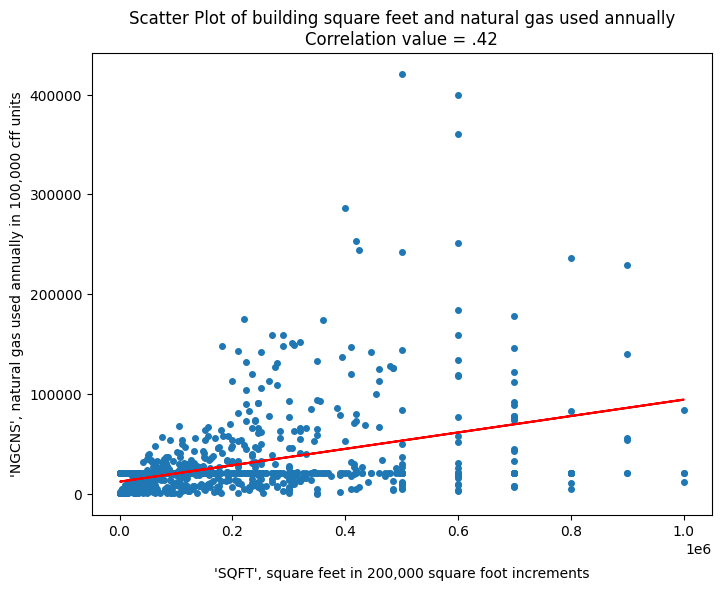

In [212]:
# set default marker size
plt.rcParams['lines.markersize'] = 4

# assign x and y values
x = df_wk_filtered_num['SQFT']
y = df_wk_filtered_num['NGCNS']

# adjust dimensions of plot
plt.figure(figsize=(8, 6)) 
# Create scatter plot
plt.scatter(x, y)

# calculate line of best fit
m, b = np.polyfit(x, y, 1)

# plot best fit line
plt.plot(x, m*x + b, color='red')
plt.xlabel("X-axis Label", labelpad=20)

# add labels and title
plt.xlabel("'SQFT', square feet in 200,000 square foot increments")
plt.ylabel("'NGCNS', natural gas used annually in 100,000 cff units")
plt.title('Scatter Plot of building square feet and natural gas used annually\nCorrelation value = .42')

# Display plot
plt.show()

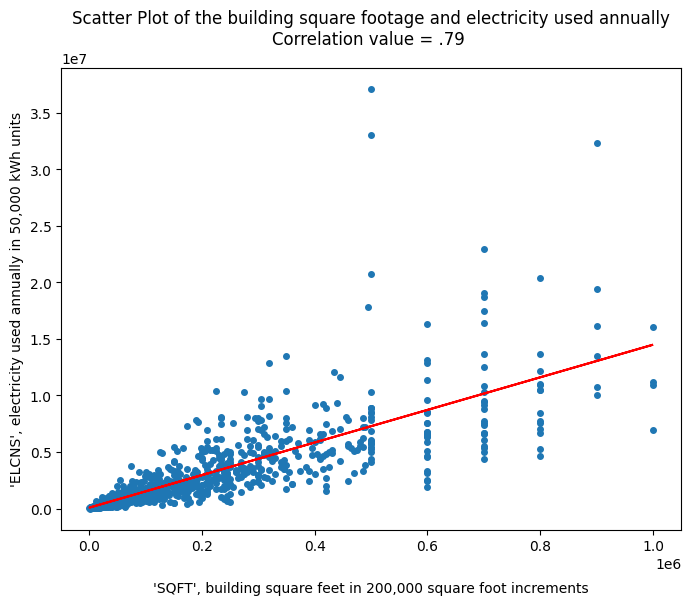

In [213]:
# set default marker size
# plt.rcParams['lines.markersize'] = 4

# assign x and y values
x = df_wk_filtered_num['SQFT']
y = df_wk_filtered_num['ELCNS']

# adjust dimensions of plot
plt.figure(figsize=(8, 6)) 

# create scatter plot
plt.scatter(x, y)

# calculate line of best fit
m, b = np.polyfit(x, y, 1)

# plot best fit line
plt.plot(x, m*x + b, color='red')
plt.xlabel("X-axis Label", labelpad=20)

# add labels and title
plt.xlabel("'SQFT', building square feet in 200,000 square foot increments")
plt.ylabel("'ELCNS', electricity used annually in 50,000 kWh units")
plt.title('Scatter Plot of the building square footage and electricity used annually\nCorrelation value = .79 ')

# display plot
plt.show()

#### The two following scatter plots are examples of plotting catagorical data.
- The data for the two input variable, GLSSPC and WKHRSC are in ranges of percentages or hours open w/ a numeric value identifying the selected range.
- The correlation values are reasonable, but the data does not render as expected in a scatter plot.

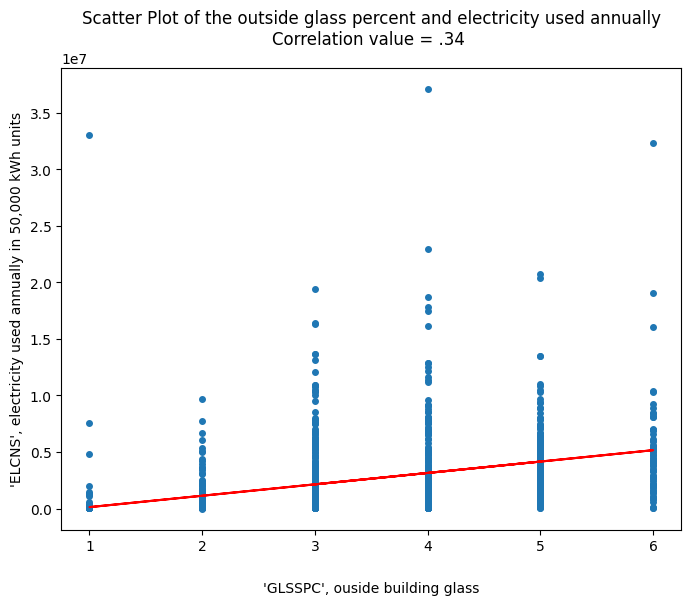

In [214]:
# set default marker size
# plt.rcParams['lines.markersize'] = 4

# assign x and y values
x = df_wk_filtered_num['GLSSPC']
y = df_wk_filtered_num['ELCNS']

# adjust dimensions of plot
plt.figure(figsize=(8, 6)) 
# create scatter plot
plt.scatter(x, y)

# calculate line of best fit
m, b = np.polyfit(x, y, 1)

# plot best fit line
plt.plot(x, m*x + b, color='red')
plt.xlabel("X-axis Label", labelpad=20)

# add labels and title
plt.xlabel("'GLSSPC', ouside building glass")
plt.ylabel("'ELCNS', electricity used annually in 50,000 kWh units")
plt.title('Scatter Plot of the outside glass percent and electricity used annually\nCorrelation value = .34 ')

# display plot
plt.show()

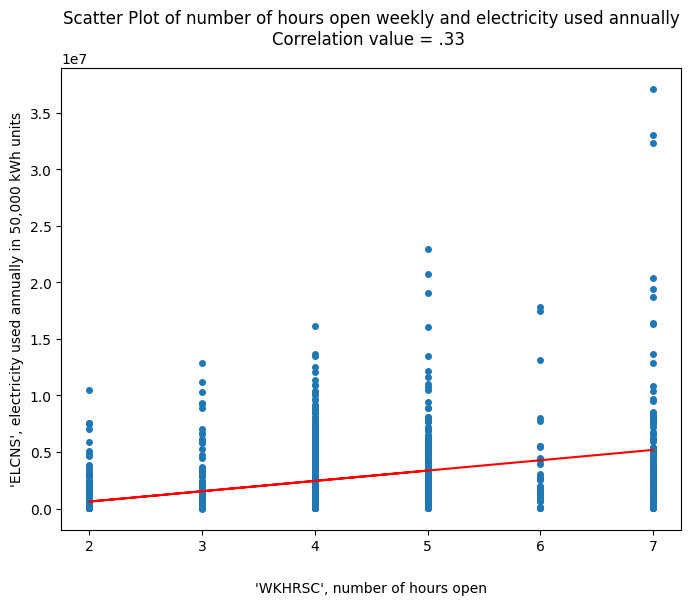

In [215]:
# set default marker size
# plt.rcParams['lines.markersize'] = 4

# extract x and y values
x = df_wk_filtered_num['WKHRSC']
y = df_wk_filtered_num['ELCNS']

# adjust dimensions of plot
plt.figure(figsize=(8, 6)) 

# create scatter plot
plt.scatter(x, y)

# calculate line of best fit
m, b = np.polyfit(x, y, 1)

# plot best fit line
plt.plot(x, m*x + b, color='red')
plt.xlabel("X-axis Label", labelpad=20)

# add labels and title
plt.xlabel("'WKHRSC', number of hours open")
plt.ylabel("'ELCNS', electricity used annually in 50,000 kWh units")
plt.title('Scatter Plot of number of hours open weekly and electricity used annually\nCorrelation value = .33 ')

# display plot
plt.show()